## KÜTÜPHANELERİN YÜKLENMESİ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler,OrdinalEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
import warnings

warnings.filterwarnings("ignore")

## VERİNİN OKUNMASI VE ANALİZİ

In [2]:
df = pd.read_csv("car_acceptability.txt",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,?,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,?,unacc


In [4]:
base_columns = ["buying","maint","doors","persons","lug_boot","safety","Classs"]

In [5]:
df.columns = base_columns

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Classs
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,?,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,?,unacc


In [7]:
df.isnull().sum()

buying      1
maint       0
doors       0
persons     0
lug_boot    0
safety      1
Classs      0
dtype: int64

## GÖRSELLEŞTİRME
## ANLAMSIZ VERİLERİN DÜZELTİLMESİ

In [8]:
unknown_values = {"?":pd.NA,
      "-":pd.NA,
      "*":pd.NA}

In [9]:
df.replace(unknown_values,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(1714, 7)

<AxesSubplot:xlabel='Classs', ylabel='count'>

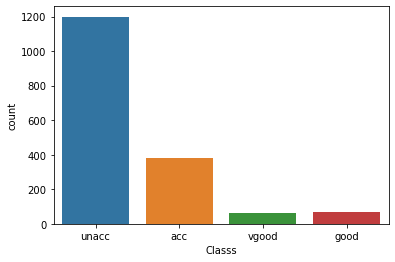

In [12]:
sns.countplot(data=df,x="Classs")

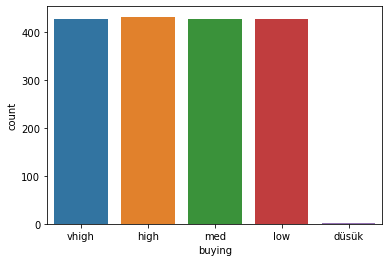

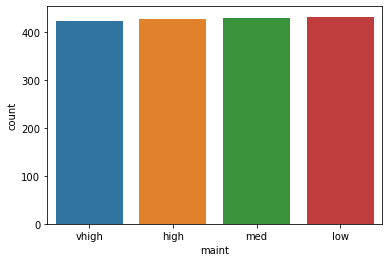

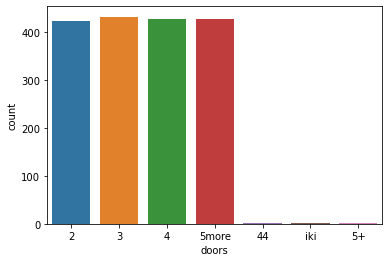

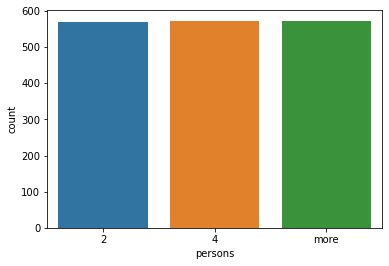

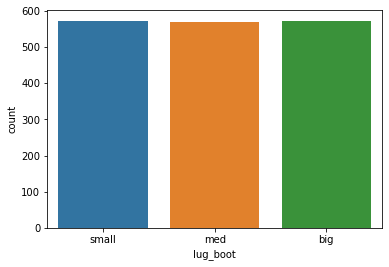

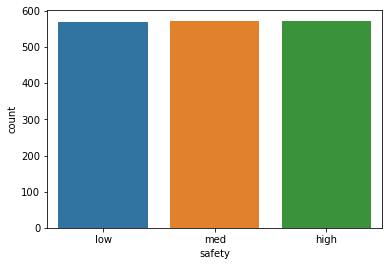

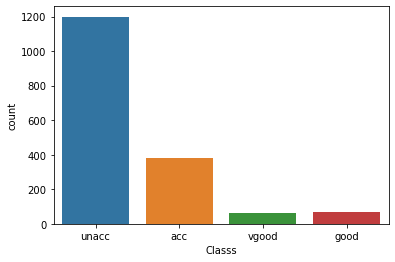

In [13]:
for col in df.columns:
    sns.countplot(data=df,x=col)
    plt.show(block=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1714 non-null   object
 1   maint     1714 non-null   object
 2   doors     1714 non-null   object
 3   persons   1714 non-null   object
 4   lug_boot  1714 non-null   object
 5   safety    1714 non-null   object
 6   Classs    1714 non-null   object
dtypes: object(7)
memory usage: 107.1+ KB


## ORDİNAL FARKLILIKLARIN DÜZELTİLMESİ

In [15]:
from pandas.api.types import CategoricalDtype
for col in df.columns:
    print(df[col].astype(CategoricalDtype(ordered=True)))


0       vhigh
1       vhigh
3       vhigh
5       vhigh
6       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying, Length: 1714, dtype: category
Categories (5, object): ['düsük' < 'high' < 'low' < 'med' < 'vhigh']
0       vhigh
1       vhigh
3       vhigh
5       vhigh
6       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: maint, Length: 1714, dtype: category
Categories (4, object): ['high' < 'low' < 'med' < 'vhigh']
0           2
1           2
3           2
5           2
6           2
        ...  
1723    5more
1724    5more
1725    5more
1726    5more
1727    5more
Name: doors, Length: 1714, dtype: category
Categories (7, object): ['2' < '3' < '4' < '44' < '5+' < '5more' < 'iki']
0          2
1          2
3          2
5          2
6          2
        ... 
1723    more
1724    more
1725    more
1726    more
1727    more
Name: persons, Length: 1714, dtype: category
Categories (3, obj

In [16]:
replacement_mapping = {
    "düsük": "low","5+":"5more" , "?" : pd.NA, "*" : pd.NA, "-" : pd.NA,"44":"4","iki":"2"
}

In [17]:
df.replace(replacement_mapping,inplace=True)

In [18]:
buying_categories=['low','med' ,'high', 'vhigh']
maint_categories = ['low','med' ,'high', 'vhigh']
lugboot_categories = ["small","med","big"]
safety_categories =["low","med","high"]
Classs_categories=["unacc","acc","good","vgood"]

In [19]:
df.buying=df.buying.astype(CategoricalDtype(buying_categories,ordered=True))

In [20]:
df.maint=df.maint.astype(CategoricalDtype(maint_categories,ordered=True))
df.lug_boot=df.lug_boot.astype(CategoricalDtype(lugboot_categories,ordered=True))
df.safety=df.safety.astype(CategoricalDtype(safety_categories,ordered=True))

In [21]:
df.Classs=df.Classs.astype(CategoricalDtype(Classs_categories,ordered=True))

In [22]:
from pandas.api.types import CategoricalDtype
for col in df.columns:
    print(df[col].astype(CategoricalDtype(ordered=True)))

0       vhigh
1       vhigh
3       vhigh
5       vhigh
6       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying, Length: 1714, dtype: category
Categories (4, object): ['low' < 'med' < 'high' < 'vhigh']
0       vhigh
1       vhigh
3       vhigh
5       vhigh
6       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: maint, Length: 1714, dtype: category
Categories (4, object): ['low' < 'med' < 'high' < 'vhigh']
0           2
1           2
3           2
5           2
6           2
        ...  
1723    5more
1724    5more
1725    5more
1726    5more
1727    5more
Name: doors, Length: 1714, dtype: category
Categories (4, object): ['2' < '3' < '4' < '5more']
0          2
1          2
3          2
5          2
6          2
        ... 
1723    more
1724    more
1725    more
1726    more
1727    more
Name: persons, Length: 1714, dtype: category
Categories (3, object): ['2' < '4' < 'more']
0    

## VERİLERİN TRAİN VE TEST OLARAK AYRILMASI

In [24]:
X = df.drop("Classs",axis=1)
y = df["Classs"]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17,stratify=y)

## ENCODİNG AŞAMASI

In [26]:
oe =OrdinalEncoder()
def Ordinal_encoder(dataframe, categorical_cols):
    encoder = OrdinalEncoder()
    X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])
    
    return X_train[categorical_cols],X_test[categorical_cols]

In [27]:
X_train[X.columns],X_test[X.columns]=Ordinal_encoder(df,X.columns)

In [28]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
523,0.0,3.0,3.0,1.0,2.0,2.0
823,0.0,1.0,2.0,1.0,1.0,2.0
276,3.0,2.0,2.0,0.0,0.0,1.0
936,2.0,3.0,2.0,2.0,2.0,1.0
684,0.0,2.0,1.0,1.0,2.0,1.0


In [29]:
le = LabelEncoder()

In [30]:
y_train=le.fit_transform(y_train)

In [31]:
y_test=le.transform(y_test)

##  MODEL TRAİNİNG ,EVULATİON

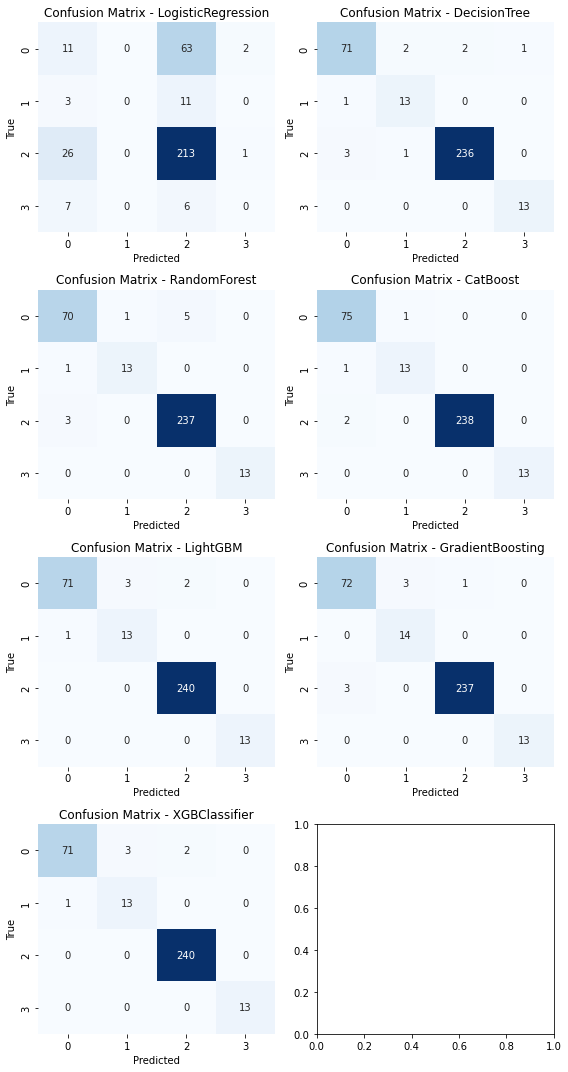

,Accuracy,Precision,Recall,F1 Score
CatBoost,0.988338,0.988562,0.988338,0.988402
LightGBM,0.982507,0.983487,0.982507,0.982672
XGBClassifier,0.982507,0.983487,0.982507,0.982672
GradientBoosting,0.979592,0.980994,0.979592,0.979923
DecisionTree,0.970845,0.971943,0.970845,0.971165
RandomForest,0.970845,0.970651,0.970845,0.970700
LogisticRegression,0.653061,0.560520,0.653061,0.598873


In [32]:
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - {model_name}')

def model(df, test_size=0.2, random_state=42):
    
    models = {
        'LogisticRegression': LogisticRegression(max_iter=5000, solver='saga',),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'CatBoost': CatBoostClassifier(verbose=False),
        'LightGBM': lgb.LGBMClassifier(verbose=-1),
        'GradientBoosting': GradientBoostingClassifier(),
        "XGBClassifier":XGBClassifier()
    }

    results = {}
    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 15))
    axes = axes.flatten()
    results = {}

    for i, (model_name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

        plot_confusion_matrix(y_test, y_pred, model_name, axes[i])

    plt.tight_layout()
    plt.show()
    
    return results

def model_to_dataframe(df, test_size=0.2, random_state=42):
    results = model(df, test_size, random_state)
    result_df = pd.DataFrame(results).T
    result_df = result_df.sort_values(by='Accuracy', ascending=False)
    return result_df

model_to_dataframe(df)

## HYPERPARAMETER TUNING

In [33]:
#LOGİSTİC REGRESSİON

In [34]:
log_model = LogisticRegression()

In [35]:
params = {"penalty":["l1","l2","elasticnet"],
         "solver":["saga","liblinear","sag"],
         "C":np.arange(1,12)}

In [36]:
log_cv_model = GridSearchCV(log_model,params,cv=10,n_jobs=-1)
log_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'liblinear', 'sag']})

In [37]:
log_cv_model.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [38]:
log_best = log_model.set_params(**log_cv_model.best_params_).fit(X_train,y_train)

In [39]:
y_pred = log_best.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.6647230320699709

In [41]:
#RANDOM FOREST

In [42]:
rf_model = RandomForestClassifier()

In [43]:
params = {"n_estimators":[100,200,300,500,1000],
         "criterion":["gini","entropy"],
         "max_depth":[2,3,5,7,9,11],
         "min_samples_split":[2,5,7,10]
         }

In [44]:
rf_cv_model = GridSearchCV(rf_model,params,cv=10,n_jobs=-1)
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 500, 1000]})

In [45]:
rf_best = rf_model.set_params(**rf_cv_model.best_params_).fit(X_train,y_train)

In [46]:
y_pred = rf_best.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.9795918367346939

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        76
           1       0.87      0.93      0.90        14
           2       0.98      1.00      0.99       240
           3       1.00      1.00      1.00        13

    accuracy                           0.98       343
   macro avg       0.96      0.96      0.96       343
weighted avg       0.98      0.98      0.98       343



In [49]:
#CAT BOOST

In [50]:
cb_model = CatBoostClassifier()

In [51]:
params = {
        'iterations': [100, 200, 300, 500],
        'learning_rate': [0.01,0.05, 0.1],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]
    }

In [52]:
cb_cv_model = GridSearchCV(cb_model,params,cv=10,n_jobs=-1).fit(X_train,y_train)

0:	learn: 1.2055458	total: 1.53ms	remaining: 764ms
1:	learn: 1.0940854	total: 3.15ms	remaining: 785ms
2:	learn: 0.9962843	total: 5.12ms	remaining: 847ms
3:	learn: 0.9341667	total: 6.78ms	remaining: 840ms
4:	learn: 0.8669234	total: 8.25ms	remaining: 817ms
5:	learn: 0.8078581	total: 9.77ms	remaining: 805ms
6:	learn: 0.7612249	total: 11.2ms	remaining: 790ms
7:	learn: 0.7197882	total: 12.7ms	remaining: 782ms
8:	learn: 0.6823066	total: 14.3ms	remaining: 780ms
9:	learn: 0.6541594	total: 15.8ms	remaining: 774ms
10:	learn: 0.6259311	total: 17.2ms	remaining: 766ms
11:	learn: 0.6025823	total: 18.7ms	remaining: 759ms
12:	learn: 0.5822324	total: 20.2ms	remaining: 758ms
13:	learn: 0.5585098	total: 21.8ms	remaining: 756ms
14:	learn: 0.5423305	total: 23.3ms	remaining: 752ms
15:	learn: 0.5213900	total: 24.8ms	remaining: 750ms
16:	learn: 0.5055117	total: 26.4ms	remaining: 749ms
17:	learn: 0.4930637	total: 27.9ms	remaining: 747ms
18:	learn: 0.4787137	total: 29.3ms	remaining: 743ms
19:	learn: 0.4674841	t

In [53]:
cb_best = cb_model.set_params(**cb_cv_model.best_params_).fit(X_train,y_train)

0:	learn: 1.2055458	total: 1.33ms	remaining: 663ms
1:	learn: 1.0940854	total: 3.11ms	remaining: 774ms
2:	learn: 0.9962843	total: 5.21ms	remaining: 863ms
3:	learn: 0.9341667	total: 7.27ms	remaining: 901ms
4:	learn: 0.8669234	total: 8.78ms	remaining: 869ms
5:	learn: 0.8078581	total: 10.2ms	remaining: 840ms
6:	learn: 0.7612249	total: 11.7ms	remaining: 823ms
7:	learn: 0.7197882	total: 13.2ms	remaining: 813ms
8:	learn: 0.6823066	total: 14.9ms	remaining: 815ms
9:	learn: 0.6541594	total: 17.6ms	remaining: 860ms
10:	learn: 0.6259311	total: 19.1ms	remaining: 848ms
11:	learn: 0.6025823	total: 21.1ms	remaining: 860ms
12:	learn: 0.5822324	total: 22.7ms	remaining: 850ms
13:	learn: 0.5585098	total: 24.2ms	remaining: 839ms
14:	learn: 0.5423305	total: 25.5ms	remaining: 826ms
15:	learn: 0.5213900	total: 26.9ms	remaining: 814ms
16:	learn: 0.5055117	total: 28.3ms	remaining: 804ms
17:	learn: 0.4930637	total: 29.7ms	remaining: 794ms
18:	learn: 0.4787137	total: 32.1ms	remaining: 812ms
19:	learn: 0.4674841	t

In [54]:
y_pred = cb_best.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00        13

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [56]:
accuracy_score(y_test,y_pred)

1.0

In [57]:
# XGB CLASSİFİER 

In [58]:
xgb_model = XGBClassifier()

In [59]:
params={"max_depth":[2,3,5,7,9,11],
       "colsample_bytree":[0.5,0.7,0.9,1],
       "eta":[0.01,0.05,0.1,0.2],
       "n_estimators":[100,200,300,500]}

In [60]:
xgb_cv_model = GridSearchCV(xgb_model,params,cv=10,n_jobs=-1).fit(X_train,y_train)
xgb_best = xgb_model.set_params(**xgb_cv_model.best_params_).fit(X_train,y_train)
y_pred = xgb_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        76
           1       0.81      0.93      0.87        14
           2       0.99      1.00      1.00       240
           3       1.00      1.00      1.00        13

    accuracy                           0.98       343
   macro avg       0.95      0.97      0.96       343
weighted avg       0.98      0.98      0.98       343



In [61]:
accuracy_score(y_test,y_pred)

0.9825072886297376

In [62]:
# DESİCİON TREE

In [63]:
dt_model = DecisionTreeClassifier()

In [64]:
params = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 3, 5, 10],
        'min_samples_leaf': [1, 2, 4]
         }

In [65]:
dt_cv_model = GridSearchCV(dt_model,params,cv=10,n_jobs=-1).fit(X_train,y_train)
dt_best = dt_model.set_params(**dt_cv_model.best_params_).fit(X_train,y_train)
y_pred = dt_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       0.81      0.93      0.87        14
           2       0.99      0.98      0.99       240
           3       0.93      1.00      0.96        13

    accuracy                           0.97       343
   macro avg       0.92      0.96      0.94       343
weighted avg       0.97      0.97      0.97       343



In [66]:
accuracy_score(y_test,y_pred)

0.9708454810495627

In [67]:
#Gradient Boosting

In [68]:
gb_model = GradientBoostingClassifier()

In [69]:
params = {"max_depth":[5,10,20,30],
         "min_samples_split":[2,3,5,7,9],
         'learning_rate': [0.01,0.05, 0.1],
         "n_estimators":[100,200,300,500]}

In [70]:
gb_cv_model = GridSearchCV(gb_model,params,cv=10,n_jobs=-1).fit(X_train,y_train)
gb_best = gb_model.set_params(**gb_cv_model.best_params_).fit(X_train,y_train)
y_pred = gb_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.81      0.93      0.87        14
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00        13

    accuracy                           0.99       343
   macro avg       0.95      0.97      0.96       343
weighted avg       0.99      0.99      0.99       343



In [71]:
accuracy_score(y_test,y_pred)

0.9883381924198251

In [72]:
# GRADİENT BOOSTİNG EN İYİ MODELİ GÖSTERMİŞTİR CAT BOOST ACCURACY 1 OLMASI OVERFİTTİNG BİR MODEL MANASINA GELİR